<h3 align="center">Mahendra Gehlot    19487    Aerospace Engineering</h3> 

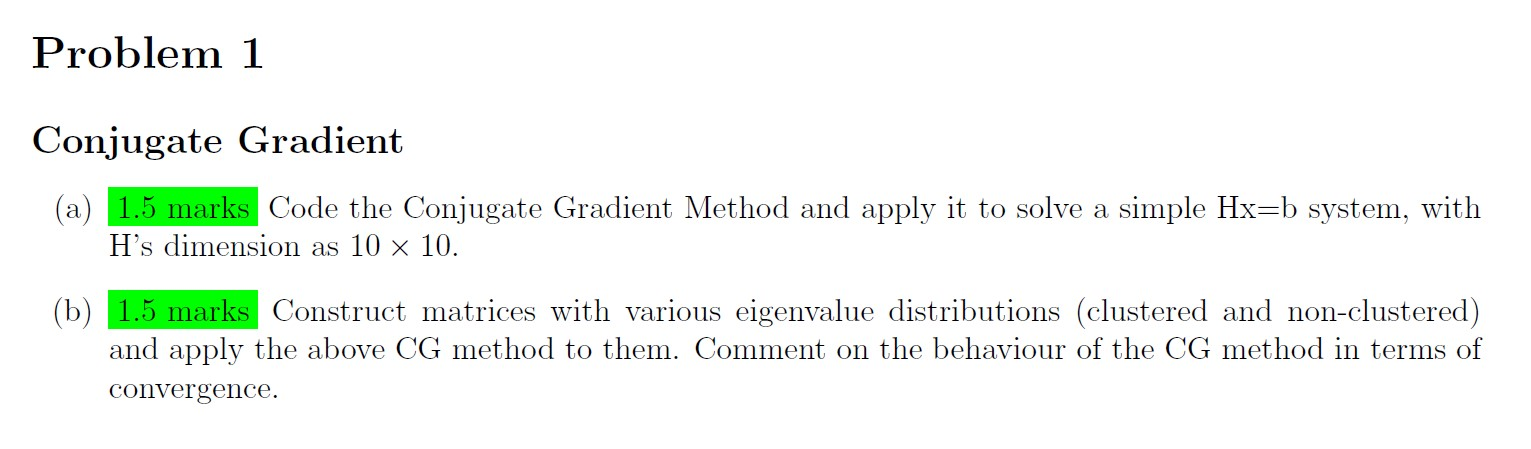

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

import pandas as pd
from scipy.stats import ortho_group
from IPython.display import display, HTML

In [2]:
# fixing the random state of numpy 
np.random.seed(125)

In [3]:
# constructing H matrix
H = np.random.rand(10,10)

# symmetric matrix
H = H.T @ H

# shape store
x_shape, _ = H.shape

In [4]:
def plot_eigens(H):
    
    """ Plot eigen values against IDs for given n*n matrix 'H'"""
    
    # get eigen values
    eigs_H, _ = np.linalg.eig(H)
    
    print('Sorted Eigen Values are: ', end = ' ')
    for value in np.sort(eigs_H):
        print(f'{value:.3f}', end = ' || ')
    
    print('\n\n')
        
    
    # plotting
    plt.plot(np.sort(eigs_H))
    plt.xlabel('Eigen IDs')
    plt.ylabel('Eigen Values')
    plt.title('Sorted Eigen Values Plot')
    

Sorted Eigen Values are:  0.001 || 0.056 || 0.087 || 0.178 || 0.540 || 0.830 || 0.964 || 1.344 || 2.102 || 27.208 || 




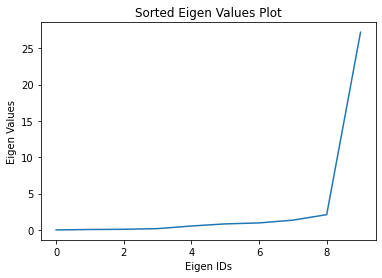

In [5]:
plot_eigens(H)

In [6]:
# generating random intial x and b columns
b = np.random.rand(x_shape,1)

In [7]:
def conjugate_grad(H,b,verbose = True):
    
    """
    
    Conjugate Gradient Algoritham to solve Hx = b 
    
    Args: H => numpy 2d array (n = m) 
          b => numpy array coeffiecient Matrix
    
    return: x  => numpy array
    
    """
    
    x_shape, _ = b.shape
    
    x_k = np.random.rand(x_shape,1)
    
    print('Conjugate Gradient INIT: ...')
    
    r_k = H @ x_k - b
    p_k = -r_k
    
    iteration_count = 0
    while np.linalg.norm(r_k) > 10**-5:
        
        #step 1
        alpha_k = (-r_k.T @ p_k)/(p_k.T @ H @ p_k)
        alpha_k = alpha_k[0,0]

        #step 2
        x_k_plus_1 = x_k + alpha_k * p_k

        #step 3
        r_k_plus_1 = H @ x_k_plus_1 - b

        # step 4
        beta_k_plus_1 = (p_k.T @ H @ r_k_plus_1) / (p_k.T @ H @ p_k)
        beta_k_plus_1 = beta_k_plus_1[0,0]

        #step 5
        p_k_plus_1 = (-r_k_plus_1) + (beta_k_plus_1 * p_k)

        #step 6 (denoting k+1 to k, so it can used for next step)
        x_k = x_k_plus_1
        r_k = r_k_plus_1
        p_k = p_k_plus_1

        # console log
        if verbose:
            print(f'ITR: {iteration_count + 1} and Norm(r_k) is {np.linalg.norm(r_k)}')

        # updating iteration count
        iteration_count += 1 
        
    return x_k

In [8]:
x_sol = conjugate_grad(H,b)
print(f'Solution is: \n {x_sol}')

Conjugate Gradient INIT: ...
ITR: 1 and Norm(r_k) is 1.231010895163412
ITR: 2 and Norm(r_k) is 0.8747781737516329
ITR: 3 and Norm(r_k) is 1.2323728173583166
ITR: 4 and Norm(r_k) is 0.4383794406195396
ITR: 5 and Norm(r_k) is 0.40349275726818656
ITR: 6 and Norm(r_k) is 0.19729396989801368
ITR: 7 and Norm(r_k) is 0.10353474942415518
ITR: 8 and Norm(r_k) is 0.24153695977840173
ITR: 9 and Norm(r_k) is 0.37020229217606
ITR: 10 and Norm(r_k) is 0.12465727643037089
ITR: 11 and Norm(r_k) is 3.5576346496557765e-10
Solution is: 
 [[ 56.40426317]
 [ 18.85658594]
 [-23.5701603 ]
 [-12.29419402]
 [ 14.18948248]
 [  7.25494814]
 [-50.70885834]
 [  7.23815554]
 [-21.25240364]
 [ 31.33040234]]


**Part 1 Conclusion** - The above output show that solution is being converged in 10 iterations. Which is reinforce statement given in Lectures. Hence, When all eigen values are different, so **Conjugate Gradient Method will converge in n number of steps.** Where n is dimension of matrix.

In [9]:
# fixing the random state of numpy 
np.random.seed(1255)

In [10]:
def cluster_solve(desired_eigs):
    """
    Performs Conjugate gradient (cluster and not-clustered)
    
    Args: 
        desired_eigs => 1d numpy array consist of desired eigen values
    
    Actions:
        1. create H_new matrix with given eigen values
        2. applies conjugate gradient on H_new and shows number iterations while convergence
        3. plots sorted eigen values
        4. show generate H_new matrix in Dataframe Format
    
    Return:
        None

    """
    # generate diag A matrix from desired eigen values
    A = np.diag(desired_eigs)
    
    # generate D orthogonal matrix
    D = ortho_group.rvs(dim=len(desired_eigs))
    
    # generating H_new having same eigen values as given in 'desired_eigs'
    H_new = D.T @ A @ D
    
    # plotting 
    plot_eigens(H_new)
    
    # solve using conjugate gradient method
    _ = conjugate_grad(H_new,b)
    
    # printing generate matrix
    print('\nGenerated H Matrix:')
    matrix = pd.DataFrame(H_new)
    
    # pandas preparation
    display(HTML(matrix.to_html()))
    
    return None

Sorted Eigen Values are:  1.000 || 2.000 || 3.000 || 4.000 || 5.000 || 6.000 || 8.000 || 10.000 || 12.000 || 13.000 || 


Conjugate Gradient INIT: ...
ITR: 1 and Norm(r_k) is 2.587856196409483
ITR: 2 and Norm(r_k) is 1.2857707576095652
ITR: 3 and Norm(r_k) is 0.6307717682584346
ITR: 4 and Norm(r_k) is 0.25349203899463524
ITR: 5 and Norm(r_k) is 0.1698614545573835
ITR: 6 and Norm(r_k) is 0.08524711391476217
ITR: 7 and Norm(r_k) is 0.037745696674553054
ITR: 8 and Norm(r_k) is 0.024956497594297668
ITR: 9 and Norm(r_k) is 0.004110116277004505
ITR: 10 and Norm(r_k) is 2.0564615262832583e-14

Generated H Matrix:


,0,1,2,3,4,5,6,7,8,9
0,5.221517,0.188212,-0.954497,1.091365,-1.169582,-0.509960,-1.463578,-1.075387,1.771708,-0.083171
1,0.188212,11.204828,-0.310644,0.753448,0.915621,-0.563584,0.579010,0.826321,0.291914,-0.993280
2,-0.954497,-0.310644,6.006108,-1.176289,2.859290,-0.963137,-1.251601,-0.817084,-0.812522,0.183700
3,1.091365,0.753448,-1.176289,4.978641,0.146708,-1.892973,-1.663912,0.544563,1.062175,-1.374233
4,-1.169582,0.915621,2.859290,0.146708,7.871978,-2.880103,0.207629,-1.694498,0.360879,1.835260
5,-0.509960,-0.563584,-0.963137,-1.892973,-2.880103,7.747018,0.540671,0.022806,-0.474054,-0.218514
6,-1.463578,0.579010,-1.251601,-1.663912,0.207629,0.540671,4.613263,-1.012444,-1.195404,0.203587
7,-1.075387,0.826321,-0.817084,0.544563,-1.694498,0.022806,-1.012444,3.899615,-1.354138,-1.037833
8,1.771708,0.291914,-0.812522,1.062175,0.360879,-0.474054,-1.195404,-1.354138,5.387903,0.724458
9,-0.083171,-0.993280,0.183700,-1.374233,1.835260,-0.218514,0.203587,-1.037833,0.724458,7.069129


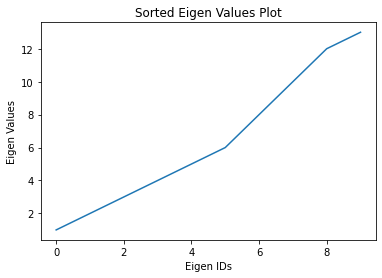

In [11]:
# creating for non-clusters of eigen values
desired_eigs = [1,2,3,4,5,6,8,10,12,13]
cluster_solve(desired_eigs)

Sorted Eigen Values are:  2.000 || 2.000 || 3.500 || 5.000 || 5.000 || 8.000 || 8.000 || 8.000 || 12.000 || 12.000 || 


Conjugate Gradient INIT: ...
ITR: 1 and Norm(r_k) is 2.0668314258960723
ITR: 2 and Norm(r_k) is 0.9378027735103102
ITR: 3 and Norm(r_k) is 0.29344641318216425
ITR: 4 and Norm(r_k) is 0.09539168092686627
ITR: 5 and Norm(r_k) is 1.8824112946854652e-14

Generated H Matrix:


,0,1,2,3,4,5,6,7,8,9
0,6.170553,-0.442385,-3.384122,0.065165,-0.846867,-1.221661,0.000873,-0.756299,1.039538,-1.697828
1,-0.442385,6.104035,0.272872,1.177499,0.133241,-0.503621,0.589851,-0.411230,-0.114450,-1.441816
2,-3.384122,0.272872,8.744856,0.241917,0.674298,0.532417,0.875888,0.725413,0.330577,-0.464059
3,0.065165,1.177499,0.241917,6.431919,0.037637,-1.271660,-1.440384,-0.623552,-2.854107,0.898917
4,-0.846867,0.133241,0.674298,0.037637,4.527738,0.842141,-0.102890,0.476436,0.594081,-0.114697
5,-1.221661,-0.503621,0.532417,-1.271660,0.842141,6.456303,-0.490983,-0.210728,-1.295975,-1.537810
6,0.000873,0.589851,0.875888,-1.440384,-0.102890,-0.490983,4.025211,1.236422,0.451974,-0.740799
7,-0.756299,-0.411230,0.725413,-0.623552,0.476436,-0.210728,1.236422,8.123534,0.062872,-0.951331
8,1.039538,-0.114450,0.330577,-2.854107,0.594081,-1.295975,0.451974,0.062872,8.230202,-1.762811
9,-1.697828,-1.441816,-0.464059,0.898917,-0.114697,-1.537810,-0.740799,-0.951331,-1.762811,6.685650


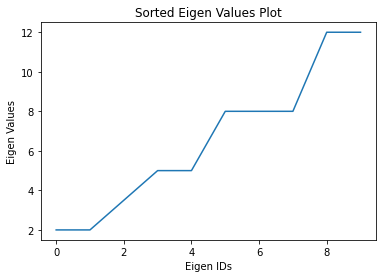

In [12]:
# creating for 4 clusters of eigen values
desired_eigs = [2,2,3.5,5,5,8,8,8,12,12]
cluster_solve(desired_eigs)

Sorted Eigen Values are:  4.000 || 4.000 || 4.000 || 8.000 || 8.000 || 8.000 || 10.000 || 12.000 || 12.000 || 12.000 || 


Conjugate Gradient INIT: ...
ITR: 1 and Norm(r_k) is 2.8315036277526526
ITR: 2 and Norm(r_k) is 1.2288457193964737
ITR: 3 and Norm(r_k) is 0.3315249341729549
ITR: 4 and Norm(r_k) is 5.51107205750267e-16

Generated H Matrix:


,0,1,2,3,4,5,6,7,8,9
0,9.295133,-0.957693,-0.658259,0.000695,-0.498084,-0.426570,-0.036484,1.001481,0.641566,0.961655
1,-0.957693,8.491958,-0.611981,-1.227238,1.641225,2.040206,-0.816415,1.081839,-0.120506,-0.232504
2,-0.658259,-0.611981,9.405676,0.226396,-2.145895,0.639983,0.379313,1.574573,0.810639,-0.103314
3,0.000695,-1.227238,0.226396,7.798195,-0.223403,-0.109009,-1.373552,1.798181,-0.757755,1.014454
4,-0.498084,1.641225,-2.145895,-0.223403,5.906436,-0.105171,0.186070,-0.066737,1.069268,-0.339305
5,-0.426570,2.040206,0.639983,-0.109009,-0.105171,6.389881,-0.348941,1.877763,-1.598055,-1.119592
6,-0.036484,-0.816415,0.379313,-1.373552,0.186070,-0.348941,9.010327,1.075983,1.485064,-0.580175
7,1.001481,1.081839,1.574573,1.798181,-0.066737,1.877763,1.075983,8.226920,-0.055813,-0.256941
8,0.641566,-0.120506,0.810639,-0.757755,1.069268,-1.598055,1.485064,-0.055813,8.646942,-1.008878
9,0.961655,-0.232504,-0.103314,1.014454,-0.339305,-1.119592,-0.580175,-0.256941,-1.008878,8.828531


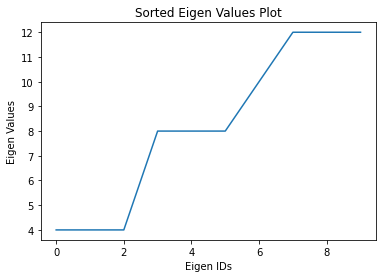

In [13]:
# creating for 3 clusters of eigen values
desired_eigs = [4,4,4,8,8,8,10,12,12,12]
cluster_solve(desired_eigs)

Sorted Eigen Values are:  5.000 || 5.000 || 5.000 || 5.000 || 7.000 || 9.000 || 9.000 || 9.000 || 9.000 || 9.000 || 


Conjugate Gradient INIT: ...
ITR: 1 and Norm(r_k) is 2.055146396398039
ITR: 2 and Norm(r_k) is 0.3815808911485185
ITR: 3 and Norm(r_k) is 8.86550624783735e-16

Generated H Matrix:


,0,1,2,3,4,5,6,7,8,9
0,6.805139,0.012758,-0.026152,-0.228963,0.013014,1.228674,-0.038269,0.376504,-0.398287,-0.810395
1,0.012758,6.885180,-0.113766,-0.074577,0.058690,0.205928,-0.788228,0.137693,-1.379989,1.173027
2,-0.026152,-0.113766,6.650643,0.295908,-0.419719,0.903516,-1.222736,-0.221294,1.032337,0.266503
3,-0.228963,-0.074577,0.295908,8.077500,1.230589,0.064144,-0.452945,-0.592823,-0.366034,-0.635966
4,0.013014,0.058690,-0.419719,1.230589,7.316728,0.055138,0.564466,0.872987,0.427722,0.777454
5,1.228674,0.205928,0.903516,0.064144,0.055138,6.426175,-0.771492,0.271536,0.260775,-0.072955
6,-0.038269,-0.788228,-1.222736,-0.452945,0.564466,-0.771492,6.553727,-0.175654,0.219471,-0.161616
7,0.376504,0.137693,-0.221294,-0.592823,0.872987,0.271536,-0.175654,8.290818,0.092520,-0.270159
8,-0.398287,-1.379989,1.032337,-0.366034,0.427722,0.260775,0.219471,0.092520,7.414715,0.500474
9,-0.810395,1.173027,0.266503,-0.635966,0.777454,-0.072955,-0.161616,-0.270159,0.500474,7.579375


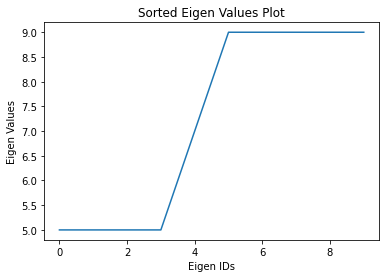

In [14]:
# creating for 2 clusters of eigen values
desired_eigs = [5,5,5,5,7,9,9,9,9,9]
cluster_solve(desired_eigs)

**Part 2 Conclusion** - The above outputs show that number of iteration to get solution is **less than or equal to number of eigen values clusters**. 




<h6 align="center">Here is table of Eigen values cluster number vs number of iterations.</h6> 

| Sr No | Number of Cluster | ITRs to Converge |
| --- | --- | --- |
| 1 | 10 | 9 |
| 2 | 4 | 4 |
| 3 | 3 | 3 |
| 4 | 2 | 2 |
 

In [15]:
# import IPython
# IPython.Application.instance().kernel.do_shutdown(True)

# Q2

In [16]:
import numpy as np
import pandas as pd
from scipy import optimize

In [17]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [18]:
def make_row(equation_dict):
    
    """
    create rows for matrix
    
    Arg:
        equation_dict: 'var names': values
        
    return:
        np 1D array
    
    """

    all_vars = [
        'z1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y1', 'y2', 'y3',
        'y4', 'y5', 'y6', 'y7', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'
    ]

    row_entires = []

    for variable in all_vars:
        # populating co-efficient values in row if it is dict
        if variable in equation_dict:
            row_entires.append(equation_dict[variable])
        else:
            row_entires.append(0.)

    return np.array(row_entires)

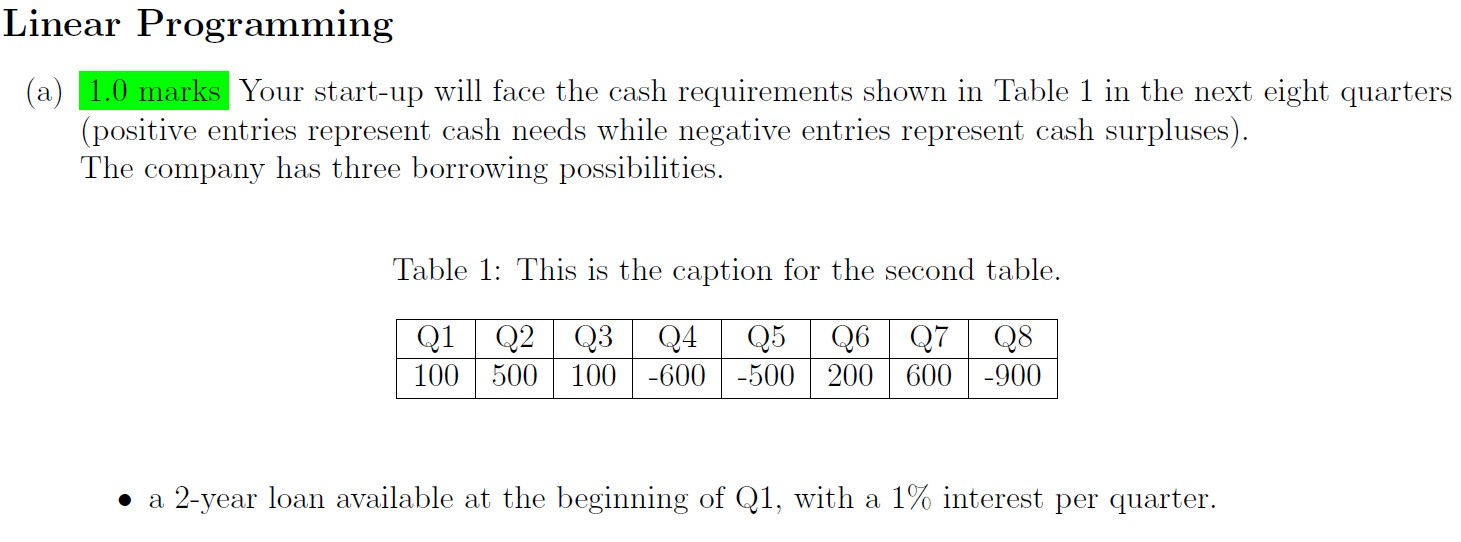

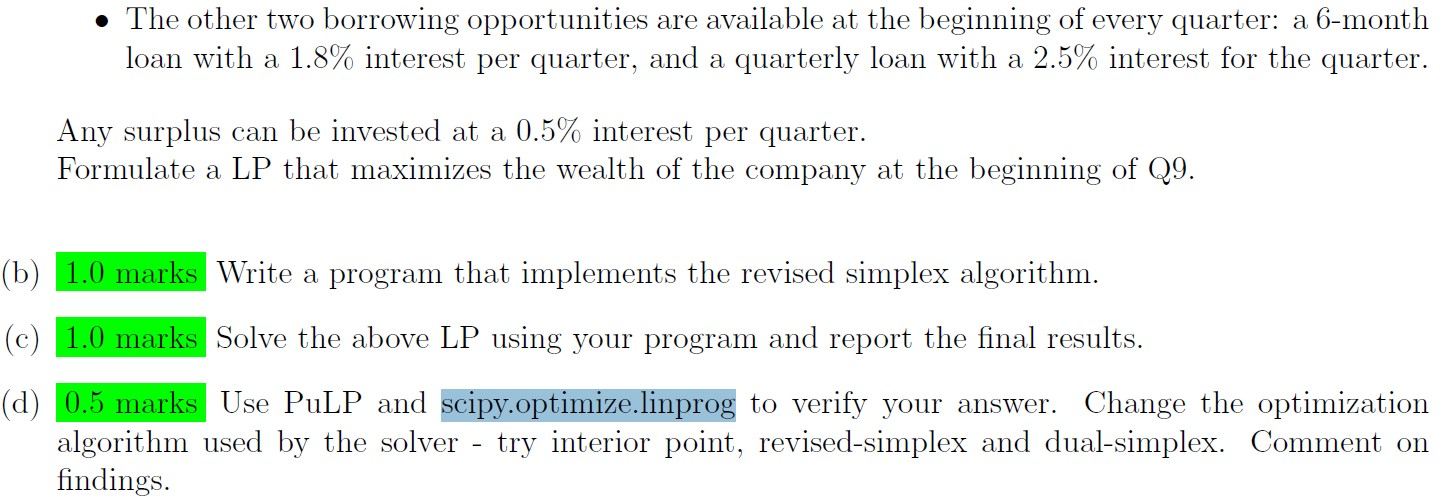

#  part-a - Linear programming problem formulation 

Available loans are as follows
1. Z is 2-years loan with 1% interest per quarter
2. Y is 6-month loan with 1.8% interest per quarter
3. X is 3-month loan with 2.5% interest per quarter

Let define naming convention for loans: 

Loan $A_{i}$ is loan $A$ took at starting of $i^{th}$ quarter.

The surplus is defined by $C_{i}$, surplus at starting of $i^{th}$ quarter.

### Q1

$Z_{1} + X_{1} + Y_{1} - C_{1} = 100$

### Q2

$1.005C_{1} + X_{2} + Y_{2} - 1.025X_{1} - C_{2} = 500$

### Q3

$1.005C_{2} + X_{3} + Y_{3} - 1.036Y_{1} - 1.025X_{2} - C_{3} = 100$

### Q4

$1.005C_{3} + X_{4} + Y_{4} - 1.036Y_{2} - 1.025X_{3} - C_{4} = -600$

### Q5

$1.005C_{4} + X_{5} + Y_{5} - 1.036Y_{3} - 1.025X_{4} - C_{5} = -500$

### Q6

$1.005C_{5} + X_{6} + Y_{6} - 1.036Y_{4} - 1.025X_{5} - C_{6} = 200$

### Q7

$1.005C_{6} + X_{7} + Y_{7} - 1.036Y_{5} - 1.025X_{6} - C_{7} = 600$

### Q8

$1.005C_{7} + X_{8} - 1.036Y_{6} - 1.025X_{7} - C_{8} = -900$

The surplus at start of $Q9$ = $1.005C_{8} - 1.08Z_{1} - 1.036Y_{7} - 1.025X_{8}$

Converting this to minimization problem, so obejective function would be
$-1.005C_{8} + 1.08Z_{1} + 1.036Y_{7} + 1.025X_{8}$


In [19]:
Q1 = {'z1': 1, 'x1': 1, 'y1': 1, 'c1': -1}
A_Q1 = make_row(Q1)

Q2 = {'c1': 1.005, 'x2': 1, 'y2': 1, 'x1': -1.025, 'c2': -1}
A_Q2 = make_row(Q2)

Q3 = {'c2': 1.005, 'x3': 1, 'y3': 1, 'y1': -1.036, 'x2': -1.025, 'c3': -1}
A_Q3 = make_row(Q3)

Q4 = {'c3': 1.005, 'x4': 1, 'y4': 1, 'y2': -1.036, 'x3': -1.025, 'c4': -1}
A_Q4 = make_row(Q4)

Q5 = {'c4': 1.005, 'x5': 1, 'y5': 1, 'y3': -1.036, 'x4': -1.025, 'c5': -1}
A_Q5 = make_row(Q5)

Q6 = {'c5': 1.005, 'x6': 1, 'y6': 1, 'y4': -1.036, 'x5': -1.025, 'c6': -1}
A_Q6 = make_row(Q6)

Q7 = {'c6': 1.005, 'x7': 1, 'y7': 1, 'y5': -1.036, 'x6': -1.025, 'c7': -1}
A_Q7 = make_row(Q7)

Q8 = {'c7': 1.005, 'x8': 1, 'y6': -1.036, 'x7': -1.025, 'c8': -1}
A_Q8 = make_row(Q8)

A = np.vstack((A_Q1, A_Q2, A_Q3, A_Q4, A_Q5, A_Q6, A_Q7, A_Q8))

In [20]:
b = np.array([100, 500, 100, -600, -500, 200, 600, -900]).reshape(-1, 1)

In [21]:
c = {'c8': 1.005, 'z1': -1.08, 'y7': -1.036, 'x8': -1.025}
c = -make_row(c)

# part-b

In [22]:
def simplex(A, b, c, B_cols, N_cols, MAX_ITR=500):
    
    """
    solve standard form of linear programming problem
    min(c.T * x)
    such that Ax = b and x > 0
    
    Args:
        A: nd np.array
        b: co-effiecient column
        c: obejctive co-effiecient
    return:
        res: dict('status, IDs, values')
        
    """

    itr_count = 0
    while itr_count < MAX_ITR:

        # makeing iteration count
        itr_count += 1
        if itr_count == MAX_ITR - 1:
            res = dict()
            res['status'] = 'maximum iterations reached!'
            return res

        # basic matrix and non matrix
        N = A[:, N_cols]
        B = A[:, B_cols]

        # generating c colums corresponding to basic and non-basic matrix
        C_B = c[B_cols]
        C_N = c[N_cols]

        # using primal calculating x_b
        x_B = np.linalg.inv(B) @ b

        # solving dual (kkt imposed), get s_n
        S_N = C_N - ((np.linalg.inv(B) @ N).T @ C_B)

        # check convergence conditions
        if (S_N >= 0).all():
            res = dict()
            res['status'] = 'Solution Found'
            res['index'] = B_cols
            res['values'] = x_B
            return res

        else:

            # finding most negative index in S_N
            q_index = N_cols[np.argmin(S_N)]

            # calculating d to access importence of indexes
            d = np.linalg.inv(B) @ A[:, q_index].T

            # check condition of unboundness
            if (d <= 0).all():
                res = dict()
                res['status'] = 'Problem is Unbounded'
                res['index'] = None
                res['values'] = None
                return res

            # find minimum positive index d_i
            division = x_B.squeeze() / d

            all_pos_idx = np.where(division > 0)[0]
            min_pos_index = all_pos_idx[division[all_pos_idx].argmin()]

            p_index = B_cols[min_pos_index]

            # deleting p and q index
            N_cols = np.delete(N_cols, np.argwhere(N_cols == q_index))
            B_cols = np.delete(B_cols, np.argwhere(B_cols == p_index))

            # swapping p and q index in N and B
            N_cols = np.append(N_cols, p_index)
            B_cols = np.append(B_cols, q_index)

In [23]:
######################## PHASE 01 ###################
#####################################################

# creating Z matrix (refer eq. 13.40 Jorge Nocedal Stephen J. Wright "Numerical Optimization" Second Edition)

z_diag = []

for ele in b:

    if ele >= 0:
        z_diag.append(1)
    else:
        z_diag.append(-1)

# Z diagonal matrix
z = np.diag(z_diag)

# creating A\' matirx (concate A and Z)
A_dash = np.hstack((A, z))

# b is same for phase 1 and 2 both
# preparation on new objective co-efficients
_, a_dim = A.shape
z_dim, _ = z.shape

# creating C column for phase 1 obejctive function
c_ph1 = [0.0] * a_dim + [1.0] * z_dim
c_ph1 = np.array(c_ph1)
c_ph1 = c_ph1.reshape(-1, 1)

# basic variable of phase 1 would be (x,z) = (0,z)
basis_var_id = np.array([24, 25, 26, 27, 28, 29, 30, 31])

# checking length of basic varibles, (should be exactly equal to number of eqs.)
phase1_B_cols = np.array(list(set(basis_var_id)))
assert len(set(phase1_B_cols)) == 8

# generating array of non-basic variable
_, all_cols = A_dash.shape
all_index = [*range(all_cols)]
phase1_N_cols = []
for ele in all_index:
    if ele not in phase1_B_cols:
        phase1_N_cols.append(ele)

phase1_N_cols = np.array(phase1_N_cols)

# applying simplex on phase 1 problem
simplex(A_dash, b, c_ph1, phase1_B_cols, phase1_N_cols)

{'status': 'Solution Found',
 'index': array([10,  1, 11,  9, 14, 21, 23, 20]),
 'values': array([[579.15057915],
        [ 77.22007722],
        [123.6       ],
        [ 22.77992278],
        [423.20477337],
        [597.01492537],
        [461.55985479],
        [371.9504    ]])}

In [24]:
################### PHASE 02 #########################
######################################################

# index found by phase 1 would be first feasible point phase 2
basis_var_id = np.array([10, 1, 11, 9, 14, 21, 23, 20])

# checking length of basic varibles, (should be exactly equal to number of eqs.)
phase2_B_cols = np.array(list(set(basis_var_id)))
assert len(set(phase2_B_cols)) == 8

# generating array of non-basic variable
_, all_cols = A.shape
all_index = [*range(all_cols)]
phase2_N_cols = []
for ele in all_index:
    if ele not in phase2_B_cols:
        phase2_N_cols.append(ele)

phase2_N_cols = np.array(phase2_N_cols)

# applying simplex on phase 2 problem
phase2_res = simplex(A, b, c, phase2_B_cols, phase2_N_cols)

phase2_res

{'status': 'Solution Found',
 'index': array([10, 20, 21, 23,  0,  3, 16, 19]),
 'values': array([[198.75316757],
        [793.04967699],
        [597.01492537],
        [900.        ],
        [399.74809197],
        [100.        ],
        [299.74809197],
        [291.5917184 ]])}

In [25]:
def var_value(keys,values):
    
    """
    Show values of corresponding to keys
    
    """
    
    all_vars = [
        'z1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y1', 'y2', 'y3',
        'y4', 'y5', 'y6', 'y7', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'
    ]
    
    result = dict()
    
    for index, idx in enumerate(keys):
        result[all_vars[idx]] = values[index][0].round(5)
    
    for var in all_vars:
        if var in result:
            continue
        else:
            result[var] = 0.0
    
    return result

In [26]:
# calculating optimal value of obejctive function
x_optimal = []
for a in range(24):
    if a in phase2_res['index']:
        index = np.where(phase2_res['index'] == a)[0]
        x_optimal.append(phase2_res['values'][index].squeeze().item())
    else:
        x_optimal.append(0)

obej_function = c.T @ np.array(x_optimal)

print(f'The surplus at begining of Q9 would be {-obej_function:.5f}')

The surplus at begining of Q9 would be 472.77206


In [27]:
ans_p2 = var_value(phase2_res['index'],phase2_res['values'])

for i in sorted(ans_p2):
        print(f'{i} => {ans_p2[i]}')

c1 => 299.74809
c2 => 0.0
c3 => 0.0
c4 => 291.59172
c5 => 793.04968
c6 => 597.01493
c7 => 0.0
c8 => 900.0
x1 => 0.0
x2 => 0.0
x3 => 100.0
x4 => 0.0
x5 => 0.0
x6 => 0.0
x7 => 0.0
x8 => 0.0
y1 => 0.0
y2 => 198.75317
y3 => 0.0
y4 => 0.0
y5 => 0.0
y6 => 0.0
y7 => 0.0
z1 => 399.74809


# part-c - (scipy)

In [28]:
# simplex
res = optimize.linprog(c, A_ub=None, b_ub=None, A_eq=A, b_eq=b, method = 'simplex')

print(res)

all_vars = [
    'z1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y1', 'y2', 'y3',
    'y4', 'y5', 'y6', 'y7', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'
]

result_scipy = dict()
for index, idx in enumerate(all_vars):
    result_scipy[idx] = res.x[index].round(5)
    
print('\n')

for i in sorted(result_scipy):
        print(f'{i} => {result_scipy[i]}')

     con: array([-5.68434189e-14,  5.68434189e-14,  0.00000000e+00,  0.00000000e+00,
       -5.68434189e-14,  1.13686838e-13,  0.00000000e+00,  0.00000000e+00])
     fun: -472.7720606735535
 message: 'Optimization terminated successfully.'
     nit: 12
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([399.74809197,   0.        ,   0.        , 100.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 198.75316757,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       299.74809197,   0.        ,   0.        , 291.5917184 ,
       793.04967699, 597.01492537,   0.        , 900.        ])


c1 => 299.74809
c2 => 0.0
c3 => 0.0
c4 => 291.59172
c5 => 793.04968
c6 => 597.01493
c7 => 0.0
c8 => 900.0
x1 => 0.0
x2 => 0.0
x3 => 100.0
x4 => 0.0
x5 => 0.0
x6 => 0.0
x7 => 0.0
x8 => 0.0
y1 => 0.0
y2 => 198.75317
y3 => 0.0
y4 => 0.0
y5 => 0.0
y6 => 0.0
y7 => 0.0
z1 => 399.74809


In [29]:
# interior-point
res = optimize.linprog(c, A_ub=None, b_ub=None, A_eq=A, b_eq=b, method = 'interior-point')

print(res)

all_vars = [
    'z1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y1', 'y2', 'y3',
    'y4', 'y5', 'y6', 'y7', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'
]

result_scipy = dict()
for index, idx in enumerate(all_vars):
    result_scipy[idx] = res.x[index].round(5)
    
print('\n')

for i in sorted(result_scipy):
        print(f'{i} => {result_scipy[i]}')

     con: array([ 1.64033054e-09,  8.33819058e-09,  1.66490111e-09, -9.96897143e-09,
       -8.26520363e-09,  3.26417648e-09,  1.00021680e-08, -1.49688049e-08])
     fun: -472.7720606322208
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([3.99748092e+02, 7.94021835e-08, 1.21376730e-07, 9.99999999e+01,
       8.82878433e-08, 8.34829862e-08, 8.28098589e-08, 2.48041508e-07,
       8.67901855e-08, 8.27233159e-08, 1.98753167e+02, 3.26670745e-07,
       6.46696675e-08, 6.80404107e-08, 1.37759797e-07, 1.33124365e-07,
       2.99748092e+02, 2.75565005e-08, 8.31958083e-08, 2.91591719e+02,
       7.93049677e+02, 5.97014926e+02, 6.67755009e-07, 9.00000000e+02])


c1 => 299.74809
c2 => 0.0
c3 => 0.0
c4 => 291.59172
c5 => 793.04968
c6 => 597.01493
c7 => 0.0
c8 => 900.0
x1 => 0.0
x2 => 0.0
x3 => 100.0
x4 => 0.0
x5 => 0.0
x6 => 0.0
x7 => 0.0
x8 => 0.0
y1 => 0.0
y2 => 198.75317
y3 => 0.0
y4 => 0.0
y5 => 0.0
y6

In [30]:
# revised_simplex
res = optimize.linprog(c, A_ub=None, b_ub=None, A_eq=A, b_eq=b, method = 'revised simplex')

print(res)

all_vars = [
    'z1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y1', 'y2', 'y3',
    'y4', 'y5', 'y6', 'y7', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'
]

result_scipy = dict()
for index, idx in enumerate(all_vars):
    result_scipy[idx] = res.x[index].round(5)
    
print('\n')

for i in sorted(result_scipy):
        print(f'{i} => {result_scipy[i]}')

     con: array([ 0.00000000e+00,  0.00000000e+00,  1.42108547e-14,  0.00000000e+00,
        0.00000000e+00,  1.13686838e-13, -1.13686838e-13,  0.00000000e+00])
     fun: -472.7720606735534
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([399.74809197,   0.        ,   0.        , 100.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 198.75316757,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       299.74809197,   0.        ,   0.        , 291.5917184 ,
       793.04967699, 597.01492537,   0.        , 900.        ])


c1 => 299.74809
c2 => 0.0
c3 => 0.0
c4 => 291.59172
c5 => 793.04968
c6 => 597.01493
c7 => 0.0
c8 => 900.0
x1 => 0.0
x2 => 0.0
x3 => 100.0
x4 => 0.0
x5 => 0.0
x6 => 0.0
x7 => 0.0
x8 => 0.0
y1 => 0.0
y2 => 198.75317
y3 => 0.0
y4 => 0.0
y5 => 0.0
y6 => 0.0
y7 => 0.0
z1 => 399.74809


In [31]:
# dual-simplex

res = optimize.linprog(c, A_ub=None, b_ub=None, A_eq=A, b_eq=b, method = 'highs-ds')

print(res)

all_vars = [
    'z1', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y1', 'y2', 'y3',
    'y4', 'y5', 'y6', 'y7', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8'
]

result_scipy = dict()
for index, idx in enumerate(all_vars):
    result_scipy[idx] = res.x[index].round(5)
    
print('\n')

for i in sorted(result_scipy):
        print(f'{i} => {result_scipy[i]}')

           con: array([0., 0., 0., 0., 0., 0., 0., 0.])
 crossover_nit: 0
         eqlin:  marginals: array([1.08      , 1.07462687, 1.06321673, 1.03728462, 1.032124  ,
       1.02698905, 1.02187966, 1.005     ])
  residual: array([0., 0., 0., 0., 0., 0., 0., 0.])
           fun: -472.77206067355337
       ineqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
         lower:  marginals: array([0.        , 0.02149254, 0.01517029, 0.        , 0.02064248,
       0.02053978, 0.02043759, 0.00824534, 0.02      , 0.02149254,
       0.        , 0.00606373, 0.02667604, 0.02654332, 0.01419095,
       0.01412034, 0.        , 0.00609405, 0.02074569, 0.        ,
       0.        , 0.        , 0.01185466, 0.        ])
  residual: array([399.74809197,   0.        ,   0.        , 100.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 198.75316757,   0.        ,
         0.        ,   0.        ,   0.        ,   0.   

### Comments: 
1. Simplex - 12 Iterations (Searching over for 8 basic variable only)
2. Revised-Simplex - 10 Iterations (Searching over for 8 basic variable only)
3. Interior-points - 10 Iterations (Searching over for all 24 variable)
4. Dual-Simplex - 12 Iterations (Searching over for 8 basic variable only)

# part-c - (PuLP)

In [32]:
import pulp as p

# create a LP Minimization problem
Lp_prob = p.LpProblem('Problem', p.LpMinimize)                    
                    
# create problem Variables
z1 = p.LpVariable("z1", lowBound=0)
x1 = p.LpVariable("x1", lowBound=0)
x2 = p.LpVariable("x2", lowBound=0)
x3 = p.LpVariable("x3", lowBound=0)
x4 = p.LpVariable("x4", lowBound=0)
x5 = p.LpVariable("x5", lowBound=0)
x6 = p.LpVariable("x6", lowBound=0)
x7 = p.LpVariable("x7", lowBound=0)
x8 = p.LpVariable("x8", lowBound=0)
y1 = p.LpVariable("y1", lowBound=0)
y2 = p.LpVariable("y2", lowBound=0)
y3 = p.LpVariable("y3", lowBound=0)
y4 = p.LpVariable("y4", lowBound=0)
y5 = p.LpVariable("y5", lowBound=0)
y6 = p.LpVariable("y6", lowBound=0)
y7 = p.LpVariable("y7", lowBound=0)
c1 = p.LpVariable("c1", lowBound=0)
c2 = p.LpVariable("c2", lowBound=0)
c3 = p.LpVariable("c3", lowBound=0)
c4 = p.LpVariable("c4", lowBound=0)
c5 = p.LpVariable("c5", lowBound=0)
c6 = p.LpVariable("c6", lowBound=0)
c7 = p.LpVariable("c7", lowBound=0)
c8 = p.LpVariable("c8", lowBound=0)

# objective Function
Lp_prob += -1.005*c8 + 1.025*x8 + 1.08*z1 + 1.036*y7

# constraints:
# Q1
Lp_prob += z1 + x1 + y1 - c1 == 100
# Q2
Lp_prob += 1.005*c1 + x2 + y2 - 1.025*x1 - c2 == 500 
# Q3
Lp_prob += 1.005*c2 + x3 + y3 -1.025*x2 - 1.036*y1 - c3 == 100
# Q4
Lp_prob += 1.005*c3 + x4 + y4 -1.025*x3 - 1.036*y2 - c4 == -600
# Q5
Lp_prob += 1.005*c4 + x5 + y5 -1.025*x4 - 1.036*y3 - c5 == -500
# Q6
Lp_prob += 1.005*c5 + x6 + y6 -1.025*x5 - 1.036*y4 - c6 == 200
# Q7
Lp_prob += 1.005*c6 + x7 + y7 -1.025*x6 - 1.036*y5 - c7 == 600
# Q8
Lp_prob += 1.005*c7 + x8 -1.025*x7 - 1.036*y6 - c8 == -900


# display the problem
print(Lp_prob)

# solver
status = Lp_prob.solve()  
print(p.LpStatus[status])

# printing the final solution
for v in Lp_prob.variables():
    print(v.name, "=", v.varValue)

Problem:
MINIMIZE
-1.005*c8 + 1.025*x8 + 1.036*y7 + 1.08*z1 + 0.0
SUBJECT TO
_C1: - c1 + x1 + y1 + z1 = 100

_C2: 1.005 c1 - c2 - 1.025 x1 + x2 + y2 = 500

_C3: 1.005 c2 - c3 - 1.025 x2 + x3 - 1.036 y1 + y3 = 100

_C4: 1.005 c3 - c4 - 1.025 x3 + x4 - 1.036 y2 + y4 = -600

_C5: 1.005 c4 - c5 - 1.025 x4 + x5 - 1.036 y3 + y5 = -500

_C6: 1.005 c5 - c6 - 1.025 x5 + x6 - 1.036 y4 + y6 = 200

_C7: 1.005 c6 - c7 - 1.025 x6 + x7 - 1.036 y5 + y7 = 600

_C8: 1.005 c7 - c8 - 1.025 x7 + x8 - 1.036 y6 = -900

VARIABLES
c1 Continuous
c2 Continuous
c3 Continuous
c4 Continuous
c5 Continuous
c6 Continuous
c7 Continuous
c8 Continuous
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous
x7 Continuous
x8 Continuous
y1 Continuous
y2 Continuous
y3 Continuous
y4 Continuous
y5 Continuous
y6 Continuous
y7 Continuous
z1 Continuous

Optimal
c1 = 299.74809
c2 = 0.0
c3 = 0.0
c4 = 291.59172
c5 = 793.04968
c6 = 597.01493
c7 = 0.0
c8 = 900.0
x1 = 0.0
x2 = 0.0
x3 = 100.0
x4 = 0.0
x5 = 0.

In [33]:
# import IPython
# IPython.Application.instance().kernel.do_shutdown(True)

# Problem 3

## Quadratic Programming
$min$ ${x_1}^2 + 2{x_2}^2 - 2{x_1} - 6{x_2} - 2{x_1}{x_2}$

Such that


${x_1} + {x_2} \leq 2$


$-{x_1} + 2{x_2} \leq 2$


${x_1}, {x_2} \geq 0$

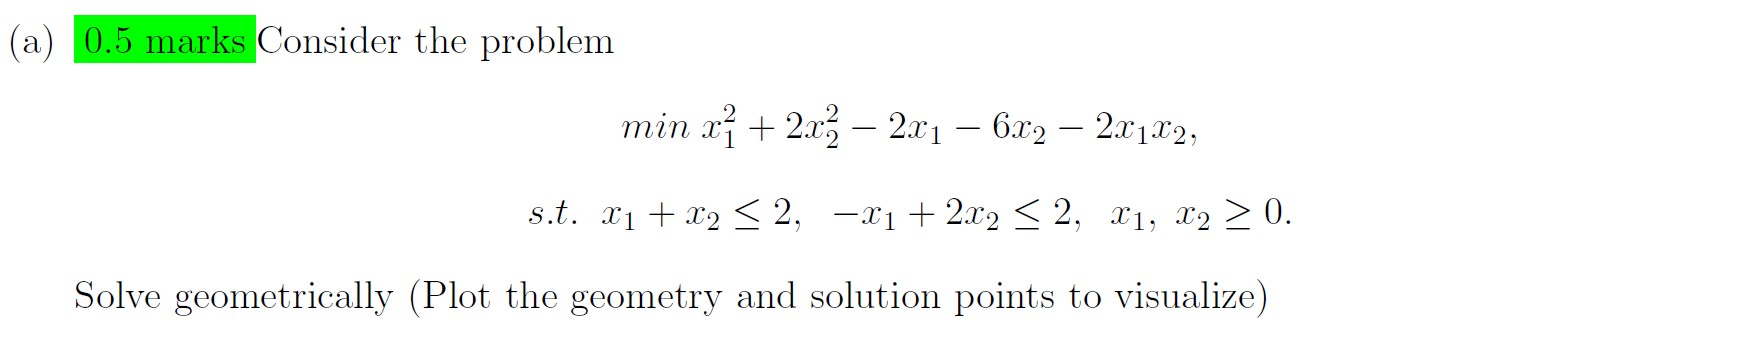

In [34]:
import numpy as np
import matplotlib.pyplot as plt


x1list = np.linspace(-2.0, 4.0, 100)
x2list = np.linspace(-2.0, 4.0, 100)


def obj_value(x1,x2):
    return (x1**2) + (2*x2**2) - (2*x1) - (6*x2) - (2*x1*x2)

obj_values = np.vectorize(obj_value)


X1, X2 = np.meshgrid(x1list, x2list)
function_values = obj_values(X1,X2)


ax_1 = X1.reshape(-1)
ax_2 = X2.reshape(-1)

In [35]:
def plot_contour_cc(x_sol = None, x_lis = None, start = False):
    """
    Plot contour, arrows and points while iterations.
    
    Args: x_sol: contain final optimal point as numpy array
          x_lis: contains all the points where algorithm reached while solving problem
          start: if True, plot contour, constraints and final solution.
          
    return: None
    
    """
    plt.rcParams['figure.figsize'] = [20, 12]
    fig, ax = plt.subplots(1, 1)
    contour_plot = ax.contour(X1,X2,function_values,levels=[-16,-15,-13,-12,-9, -7.2, -6, -4, -2, 0, 3, 5,10,25,40,50])
    ax.clabel(contour_plot, inline=True, fontsize=10)

    # drawing constrined x1 + x2 <= 2
    ax.plot([-2, 4], [4, -2])

    # drawing constrined -x1 + 2x2 <= 2
    ax.plot([-2, 4], [0, 3])

    # drawing constrined x1, x2 >= 0

    # x2 >= 0
    ax.plot([-2, 4], [0, 0])

    # x1 >= 0
    ax.plot([0, 0], [-2, 4])

    # filling and marking feasible region of contour
    ax.fill([2, 0, 0, 2 / 3, 2], [0, 0, 1, 4 / 3, 0], alpha=0.5)
    
    if start:
        plt.text(0.25, 0.35, 'Feasible Region', fontsize=18)
        plt.plot([0.8], [1.2], marker="o", markersize=8, markeredgecolor="green", markerfacecolor="white")
        plt.text(0.7, 1.3, 'Solution (0.8, 1.2)', fontsize=12)
        
    def drawArrow(A, B):
        plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1], head_width=0.1, length_includes_head=True)
    
    if not start:
        color = 'green'
        for count, item in enumerate(x_lis):
            a, b = item
            if count != 0:
                # drawing line between points
                two_points = np.vstack((x_lis[count-1],x_lis[count])).T
                plt.plot(two_points[0], two_points[-1], 'k--', linewidth=3)
                
                # showing direction
                drawArrow(x_lis[count-1],x_lis[count])
            plt.plot([a], [b], marker="o", markersize=8, markeredgecolor = color, markerfacecolor="white")
        plt.text(0.7, 1.3, 'Solution (0.8, 1.2)', fontsize=12)

    # fig.colorbar(contour_plot)
    ax.set_title('Objective Function and Constrains')
    ax.set_xlabel('X1', fontsize=16)
    ax.set_xlabel('X2', fontsize=16)
    plt.show()

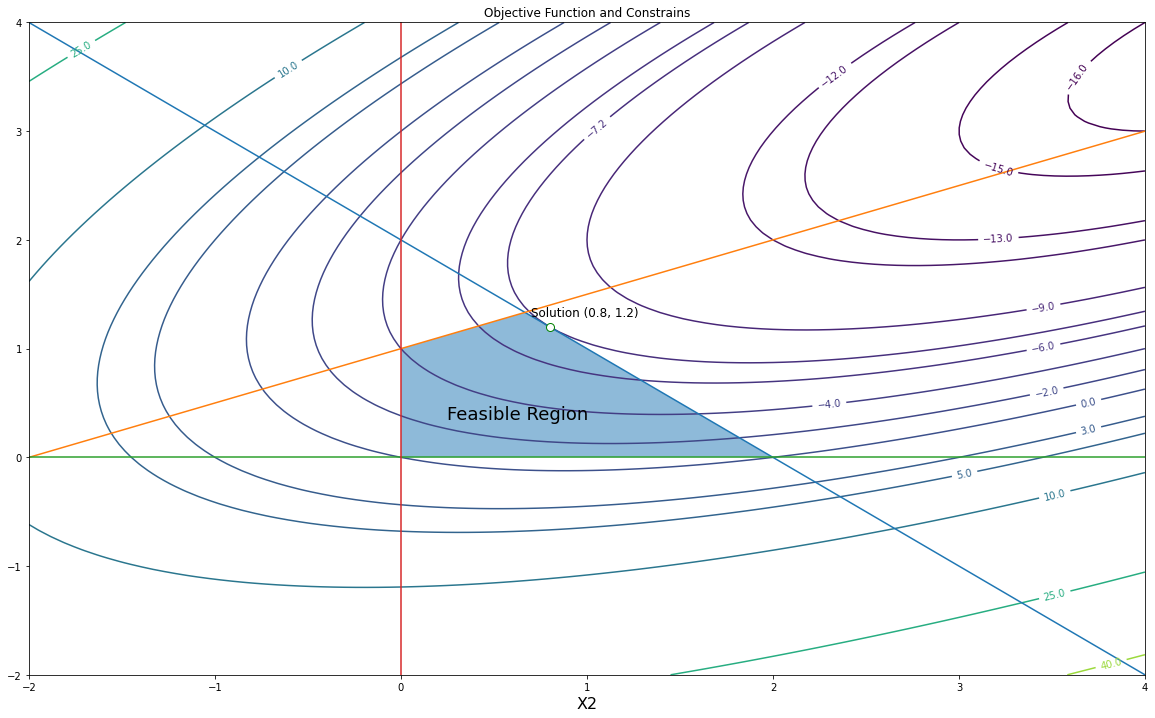

In [36]:
plot_contour_cc(start = True)

## Q3 (b)

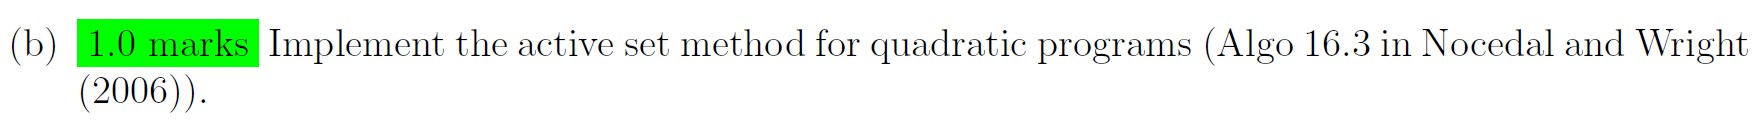

In [37]:
def active_set(G,c,A,b,x,ITRS_LIMIT=100):
    
    """
    Implementation of Active Set Method for Quadrtic Programming Problem
    
        minimize 1/2* (x.T * G * x) + (c.T * x)
        such that - Ax >= b
    
        Args: Input Matrix : G, c
              Inequality Matrix: A, b
              
        return: x_sol : optimal Solution
                x_collector: all values store while solving
                
    """
    # selecting active constraint based on current x
    w, _ = np.where(A @ x == b)
    
    # x_collector stores all previous points
    x_collector = x.T
    
    # iterate to find solution
    for iteration_count in range(ITRS_LIMIT+1):
        if iteration_count == ITRS_LIMIT:
            print('Maximum Iterations Reached!')

        # choosing active set form all constrained
        A_choosen = A[w]
        b_choosen = b[w]
        
        # creating matrix of left side in Algo 16.3 in Nocedal and Wright (2006)
        top_block = np.hstack((G,- A_choosen.T))
        zero_dim, _ = np.shape(A_choosen)
        bottom_block = np.hstack((A_choosen, np.zeros((zero_dim,zero_dim))))
        a_matrix = np.vstack((top_block,bottom_block))
        
        # creating matrix of right side in Algo 16.3 in Nocedal and Wright (2006)
        b_matrix = np.vstack((-c - (G @ x), b_choosen - (A_choosen @ x)))
        
        # finding p_and_lambda
        p_and_lambda = np.linalg.solve(a_matrix, b_matrix)
        cut_off_index, _ = np.shape(G)
        
        # splitting p and lambda
        p = p_and_lambda[:cut_off_index]
        lamda = p_and_lambda[cut_off_index:]
        
        if ((np.round(p, 5) == 0.0).all()):
            if ((lamda >= 0.0).all()):
                print('Reached at Solution! - Thank God')
                return x.T[0], x_collector
            else:
                w = np.delete(w, np.argmin(lamda))
        else:
            blocker_index = None
            alpha = 1
            for i in range(np.shape(A)[0]):
                if ((not (i in w)) and (np.dot(A[i], p) < 0)) and (((b[i] - np.dot(A[i], x)) / np.dot(A[i], p))) >= 0:
                    alpha_new = ((b[i] - np.dot(A[i], x)) / (np.dot(A[i], p)))
                    if alpha_new <= alpha:
                        alpha = alpha_new
                        blocker_index = i
            x = x + alpha * p
            x_collector = np.append(x_collector, x.T, axis=0)
            if (blocker_index != None):
                w = np.append(w, blocker_index)

    return None, None

Reached at Solution! - Thank God
All Points: 
[[0.         0.        ]
 [0.         1.        ]
 [0.66666667 1.33333333]
 [0.8        1.2       ]]
Solution = (x1: 0.800) (x2: 1.200)


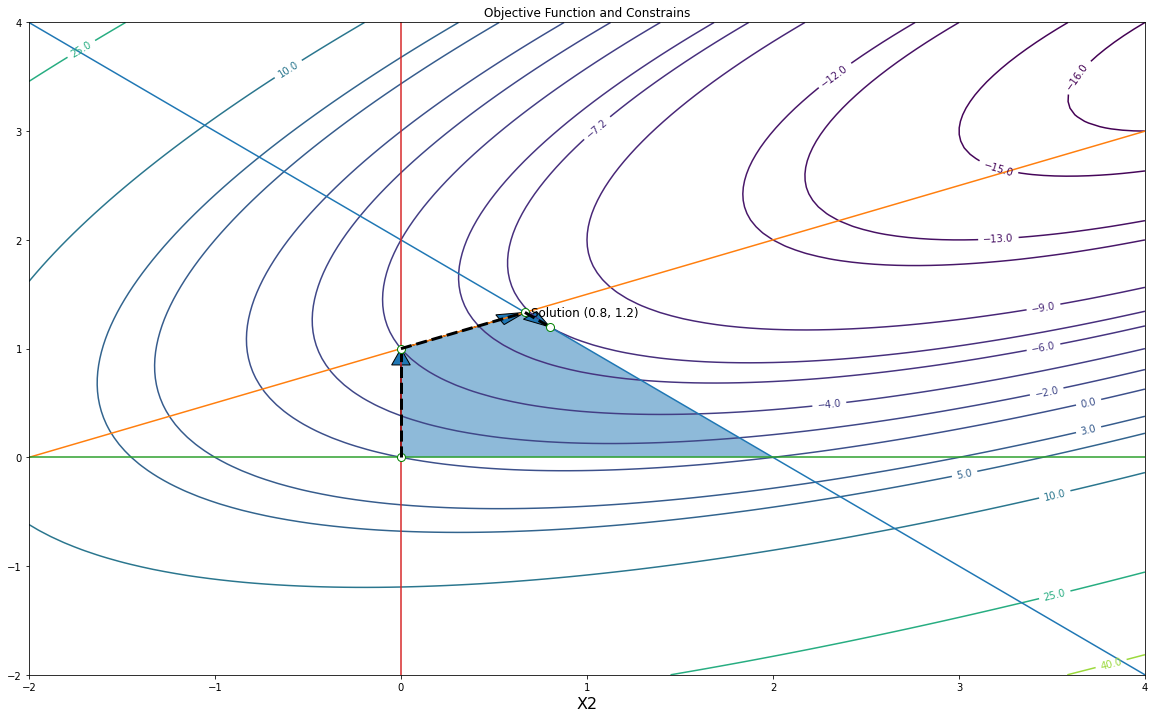

In [38]:

# matrix G, c
G = np.array([[2.0, -2.0], [-2.0, 4.0]], dtype=float)
c = np.array([[-2.0], [-6.0]], dtype=float)

# matrix A, b
A = np.array([[-1, -1], [1, -2], [1, 0], [0, 1]], dtype=float)
b = np.array([[-2], [-2], [0], [0]], dtype=float)

# set starting point from (0,0)
x = np.array([[0], [0]], dtype=float)

x_sol, x_collect = active_set(G, c, A, b, x)

if (x_sol.all() != None) and (x_collect.all() != None):
    print(f'All Points: \n{x_collect}')
    print(f'Solution = (x1: {x_sol[0]:.3f}) (x2: {x_sol[-1]:.3f})')
    plot_contour_cc(x_sol,x_collect)

## Q3 (c)

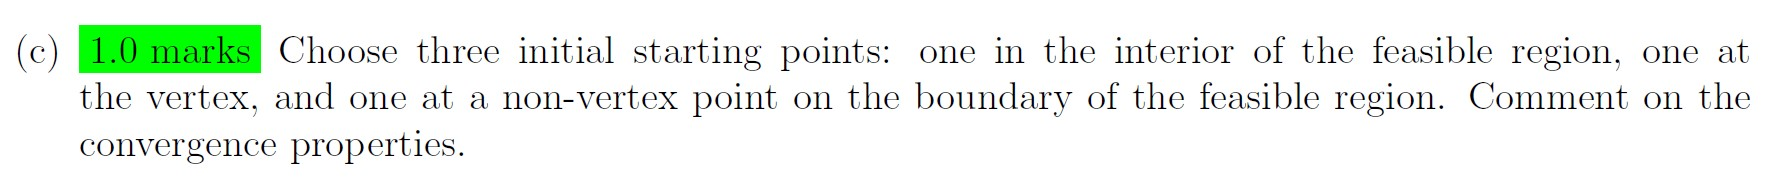

Reached at Solution! - Thank God
All Points: 
[[0.         1.        ]
 [0.66666667 1.33333333]
 [0.8        1.2       ]]
Solution = (x1: 0.800) (x2: 1.200)


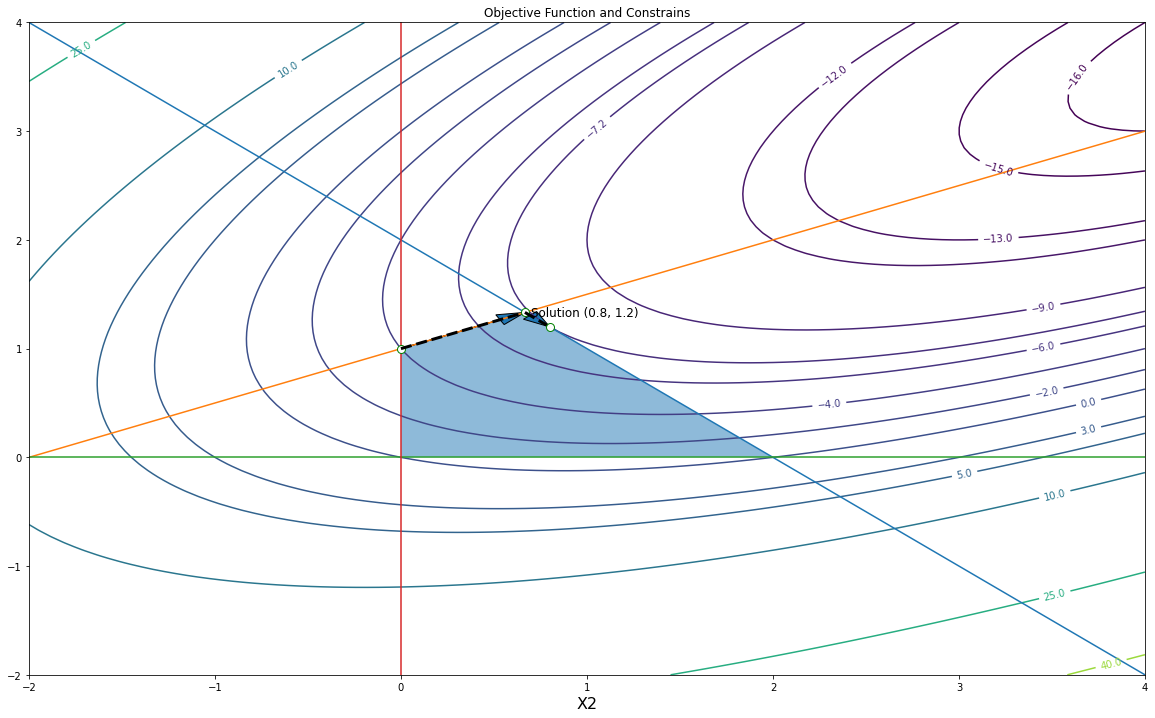

In [39]:
# starting point from (0,1) (Vertex point)
x = np.array([[0], [1]], dtype=float)

x_sol, x_collect = active_set(G, c, A, b, x)

if (x_sol.all() != None) and (x_collect.all() != None):
    print(f'All Points: \n{x_collect}')
    print(f'Solution = (x1: {x_sol[0]:.3f}) (x2: {x_sol[-1]:.3f})')
    plot_contour_cc(x_sol,x_collect)

Reached at Solution! - Thank God
All Points: 
[[0.         0.5       ]
 [0.         1.        ]
 [0.66666667 1.33333333]
 [0.8        1.2       ]]
Solution = (x1: 0.800) (x2: 1.200)


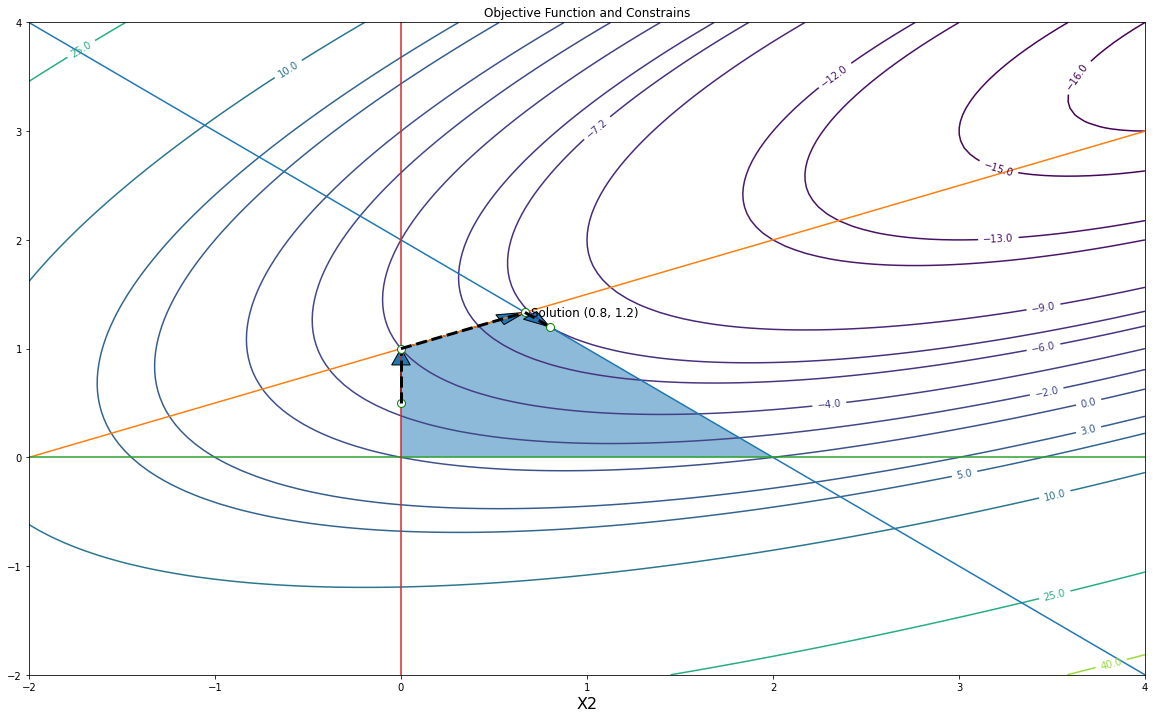

In [40]:
# starting point from (0,0.5) (point on boundary but not on vertex)
x = np.array([[0], [0.5]], dtype=float)

x_sol, x_collect = active_set(G, c, A, b, x)

if (x_sol.all() != None) and (x_collect.all() != None):
    print(f'All Points: \n{x_collect}')
    print(f'Solution = (x1: {x_sol[0]:.3f}) (x2: {x_sol[-1]:.3f})')
    plot_contour_cc(x_sol,x_collect)

Reached at Solution! - Thank God
All Points: 
[[0.5        0.25      ]
 [1.18181818 0.81818182]
 [0.8        1.2       ]]
Solution = (x1: 0.800) (x2: 1.200)


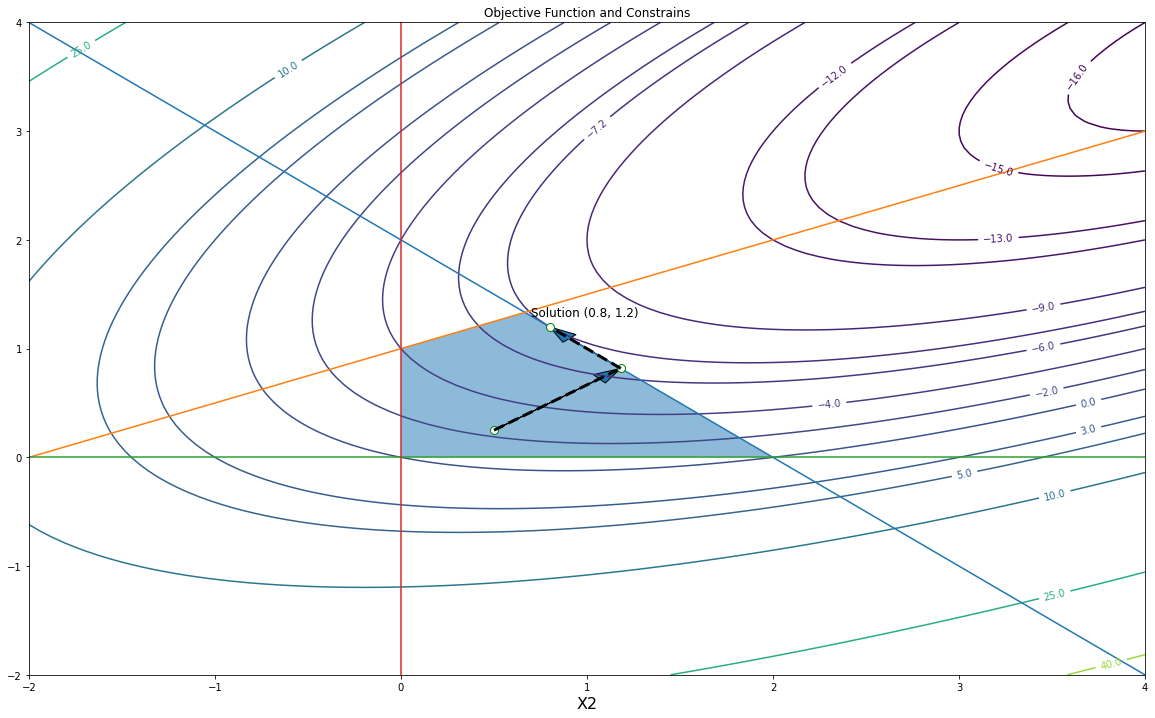

In [41]:
# starting point from (0.5,0.25) (point in feasible region but not on boundary or vertex)
x = np.array([[0.5], [0.25]], dtype=float)

x_sol, x_collect = active_set(G, c, A, b, x)

if (x_sol.all() != None) and (x_collect.all() != None):
    print(f'All Points: \n{x_collect}')
    print(f'Solution = (x1: {x_sol[0]:.3f}) (x2: {x_sol[-1]:.3f})')
    plot_contour_cc(x_sol,x_collect)

## Comments on Q3 (c):

## Comments
1. **Starting from (0,1) (Vertex point)** The solver would go from vertex to another point (may be next vertex or point on boundary also) with different working constrainst which means changing active set as and when needed. And active set method ultimatly reach at optimum point.

2. **Starting from (0,0.5) (point on boundary but is not a vertex)** The solver would still go from boundary point to another point (may be next vertex or point on boundary also) which implies alteration in active set as and when needed. The p and alpha would drive the active set solution to next point. After that it would be just above case 1, and active set method ultimatly reach at optimum point.

3. **Starting point from (0.5,0.25) (point in feasible region but not on boundary or vertex)** The solver would reach boundary point using p and alpha. After that it would be case 2 as mentioned above.

## Q3 (d)

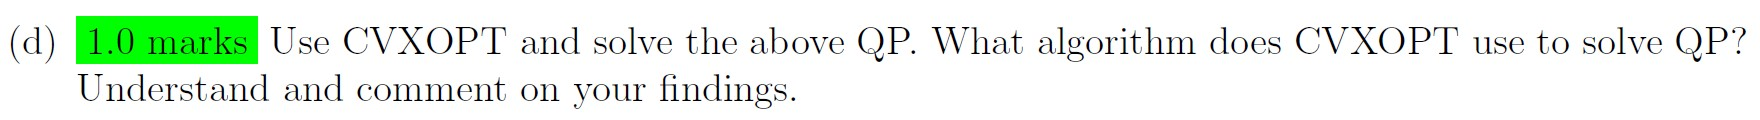

## CVOPT uses interior-point algorithm. The parameter to solver can be referred from below snippet.
1. The use of CVXOPT to develop customized interior-point solvers is decribed in the chapter Interior-point methods for large-scale cone programming, from the book Optimization for Machine Learning (edited by S. Sra, S. Nowozin, S. J. Wright, MIT Press, 2011).
2. A discussion of the interior-point algorithms used in the conelp() and coneqp() solvers can be found in the report The CVXOPT linear and quadratic cone program solvers.

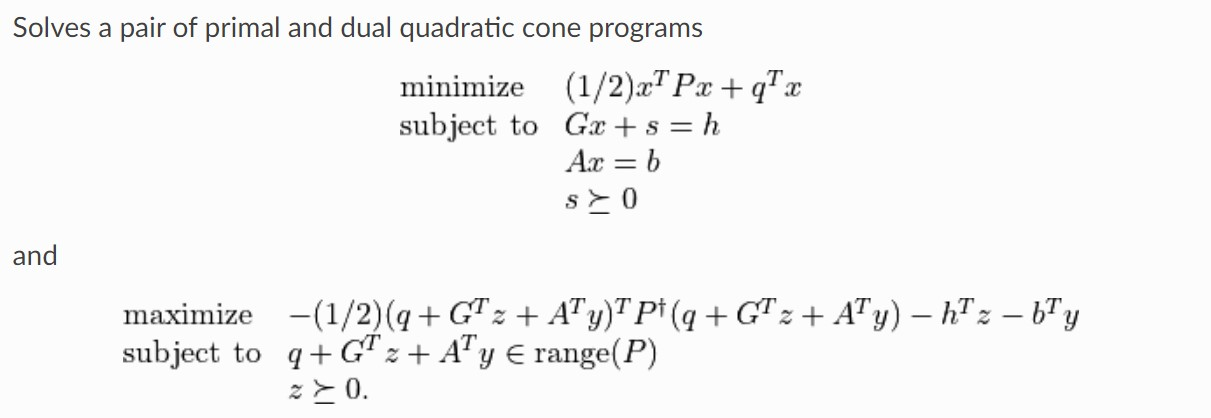

In [42]:
from cvxopt import matrix, solvers

Q = matrix([ [2.0, -2.0], [-2.0, 4.0] ])
p = matrix([-2.0, -6.0])
G = matrix([[1.0, -1.0, -1.0, 0.0],[1.0, 2.0, 0.0, -1.0]])
h = matrix([2.0, 2.0, 0.0, 0.0])

sol=solvers.qp(Q, p, G, h, A = None, b = None)

print(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -9.7394e+00 -9.9108e+00  2e+01  1e+00  9e-01
 1: -6.8303e+00 -8.8469e+00  2e+00  1e-16  4e-16
 2: -7.1760e+00 -7.3253e+00  1e-01  9e-17  5e-16
 3: -7.1998e+00 -7.2072e+00  7e-03  2e-16  2e-15
 4: -7.2000e+00 -7.2001e+00  9e-05  2e-16  4e-15
 5: -7.2000e+00 -7.2000e+00  9e-07  2e-16  1e-14
Optimal solution found.
[ 8.00e-01]
[ 1.20e+00]

